<a href="https://colab.research.google.com/github/AnitaTasnim/image_processing/blob/main/MRI_Brain_tumor_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#finding the MRI brain tumor detection dataset

https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


#import packages

In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import glob #travel in directories and get all files with necessary extension
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2 # for image processing

import random
import sys

#Reading images

In [2]:
tumor  = []
path = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/yes/*.jpg'

for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img,(128,128))
  b,g,r = cv2.split(img)
  img = cv2.merge([r,g,b])
  tumor.append(img)






In [3]:
healthy  = []
path = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/no/*.jpg'


for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img,(128,128))
  b,g,r = cv2.split(img)
  img = cv2.merge([r,g,b])
  healthy.append(img)



In [4]:
#convert all of these lists into numpy arrays
healthy  = np.array(healthy)
tumor = np.array(tumor)

tumor.shape

(86, 128, 128, 3)

In [5]:
ALL  =  np.concatenate((healthy,tumor))
ALL.shape

(171, 128, 128, 3)

In [6]:
np.random.choice(10,5)

array([1, 2, 9, 1, 3])

In [7]:

np.random.choice(10,5,replace=False)#will not repeat  numbrs


array([5, 3, 0, 1, 9])

#visualizing Brain MRI images

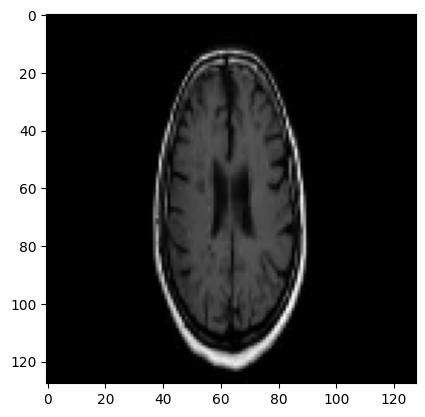

In [8]:
plt.imshow(healthy[0])

In [9]:
def plot_random(healthy,tumor,num=5):

  healthy_imgs = healthy[np.random.choice(healthy.shape[0],num,replace=False)]#will not repeat  numbrs
  tumor_imgs = tumor[np.random.choice(tumor.shape[0],num,replace=False)]#will not repeat  numbrs
  plt.figure(figsize=(16,9))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title('healthy')
    plt.imshow(healthy_imgs[i])

  plt.figure(figsize=(16,9))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title('tumor')
    plt.imshow(tumor_imgs[i])


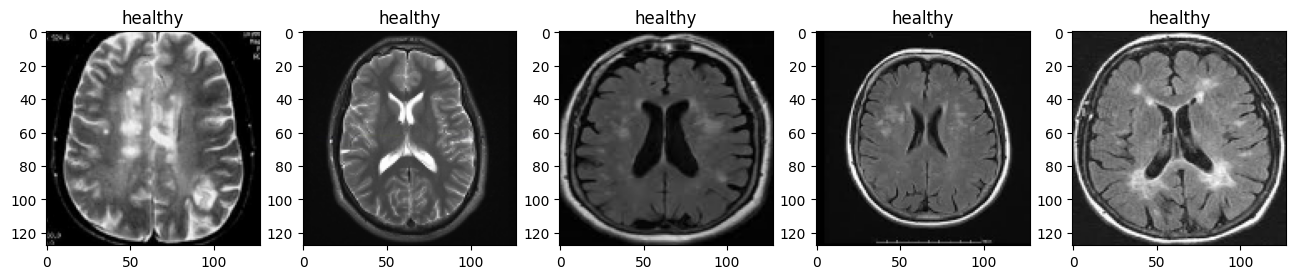

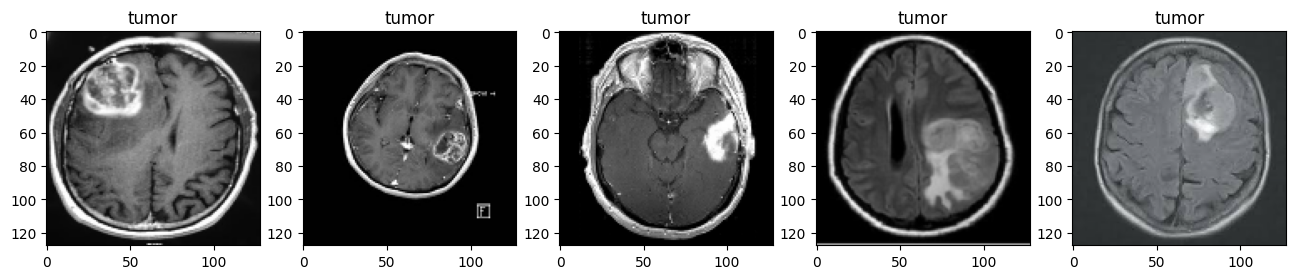

In [10]:
plot_random(healthy,tumor)

#Create Torch dataset Class

when you load a dataset into memory and represent it using a Python object, the entire dataset can indeed behave like an object. By implementing dunder methods such as __len__, __getitem__, and __iter__, you can make your dataset object act as if it were a collection or container of individual data samples (e.g., image

In [11]:
class Dataset(object):
  def __getitem__(self,index):
    raise NotImplementedError
  def __len__(self):
    raise NotImplementedError
  def __add__(self,other):
    return ConcatDataset([self,other])

#Creating MRI custom dataset class

In [12]:
'''class MRI(Dataset):
  def __init__(self,images, labels):
    self.images = images
    self.labels = labels

'''

class MRI(Dataset):
  def __init__(self):

    tumor  = []
    healthy = []
    path_T = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/yes/*.jpg'
    path_H = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/no/*.jpg'

    for f in glob.iglob(path_T):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128))
      b,g,r = cv2.split(img)
      img = cv2.merge([r,g,b])
      tumor.append(img)


    for f in glob.iglob(path_H):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128))
      b,g,r = cv2.split(img)
      img = cv2.merge([r,g,b])
      healthy.append(img)


    #our images
    tumor = np.array(tumor,dtype = np.float32)
    healthy = np.array(healthy,dtype = np.float32)
    #our lables
    tumor_label = np.ones(tumor.shape[0],dtype = np.float32)
    healthy_label = np.zeros(healthy.shape[0], dtype = np.float32)

    #concatenate
    self.images = np.concatenate((tumor,healthy)) #axis = 0, means concatenate them across first axis     # (100,512,512,3) (200,512,512,3)

    self.labels =  np.concatenate((tumor_label,healthy_label))

  def __len__(self):
    return self.images.shape[0]

  def __getitem__(self,index): #it receives the index and return the data correspond to that index

    sample = {'image': self.images[index], 'label': self.labels[index]}
    return sample

  def normalize(self):
    self.images = self.images/255.0





In [13]:
mri = MRI()

In [14]:
len(mri)

171

In [15]:
mri.normalize()


#world without dataloader

In [16]:
range(len(mri))

range(0, 171)

In [17]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[76, 170, 53, 107, 93, 78, 43, 137, 117, 32, 35, 131, 31, 28, 56, 163, 16, 164, 80, 110, 79, 15, 21, 84, 118, 65, 148, 99, 68, 103, 149, 122, 129, 144, 108, 146, 38, 154, 104, 102, 39, 139, 82, 18, 145, 106, 133, 89, 96, 159, 45, 165, 60, 5, 92, 116, 169, 124, 94, 0, 54, 14, 160, 141, 12, 69, 126, 167, 13, 10, 138, 3, 115, 114, 29, 161, 142, 112, 157, 135, 58, 119, 71, 130, 73, 11, 87, 48, 151, 2, 62, 22, 37, 49, 100, 113, 109, 91, 57, 8, 40, 66, 42, 63, 136, 98, 33, 52, 140, 85, 134, 64, 9, 152, 67, 19, 105, 75, 51, 132, 155, 83, 24, 25, 101, 46, 55, 47, 20, 156, 1, 111, 158, 81, 41, 123, 27, 162, 127, 121, 34, 88, 70, 4, 77, 86, 30, 128, 166, 120, 7, 6, 26, 153, 36, 125, 147, 95, 59, 50, 23, 74, 72, 97, 61, 90, 168, 150, 17, 143, 44]


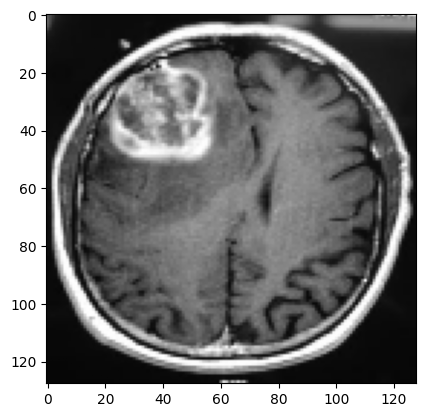

In [18]:
index = list(range(len(mri)))
random.shuffle(index)
print(index)
for idx in index:
    sample =  mri[idx]
    img =  sample['image']
    img = img.reshape(img.shape[0],img.shape[1],img.shape[2])
    plt.imshow(img)

#Creating a dataloader

Dataloader allows you to iterate through your dataset very easily

also used in shuffleing all data in dataset stored in your object

used to divide data into mini batches


